# Credit_Risk_Analysis

## About Dataset
### Description:
Welcome to the "Loan Applicant Data for Credit Risk Analysis" dataset on Kaggle! This dataset provides essential information about loan applicants and their characteristics. Your task is to develop predictive models to determine the likelihood of loan default based on these simplified features.
In today's financial landscape, assessing credit risk is crucial for lenders and financial institutions. This dataset offers a simplified view of the factors that contribute to credit risk, making it an excellent opportunity for data scientists to apply their skills in machine learning and predictive modeling.

### Column Descriptions:

- ID: Unique identifier for each loan applicant.
- Age: Age of the loan applicant.
- Income: Income of the loan applicant.
- Home: Home ownership status (Own, Mortgage, Rent).
- Emp_Length: Employment length in years.
- Intent: Purpose of the loan (e.g., education, home improvement).
- Amount: Loan amount applied for.
- Rate: Interest rate on the loan.
- Status: Loan approval status (Fully Paid, Charged Off, Current).
- Percent_Income: Loan amount as a percentage of income.
- Default: Whether the applicant has defaulted on a loan previously (Yes, No).
- Cred_Length: Length of the applicant's credit history.

Explore this dataset, preprocess the data as needed, and develop machine learning models, especially using Random Forest, to predict loan default. Your insights and solutions could contribute to better credit risk assessment - methods and potentially help lenders make more informed decisions.


In [3]:
# importing the needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
# importing the dataset
df=pd.read_csv(r"C:\Users\CHARLES\Desktop\Data science work\credit_risk.csv")

In [5]:
#top five rows 
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [7]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


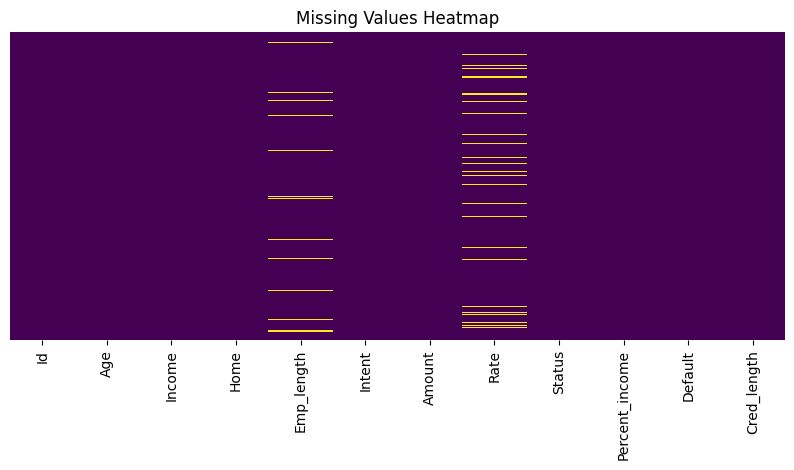

In [8]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis",yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
df.isnull().sum()*100/df.shape[0]

Id                0.000000
Age               0.000000
Income            0.000000
Home              0.000000
Emp_length        2.747000
Intent            0.000000
Amount            0.000000
Rate              9.563856
Status            0.000000
Percent_income    0.000000
Default           0.000000
Cred_length       0.000000
dtype: float64

In [10]:
#missing value Imputer
num_imputer=SimpleImputer(strategy='mean')
df[['Emp_length','Rate']]=num_imputer.fit_transform(df[['Emp_length','Rate']])

In [11]:
df.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Default'].value_counts()

Default
N    26836
Y     5745
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      32581 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            32581 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [15]:
num_features=['Age','Income','Emp_length','Amount','Rate','Status','Percent_income','Cred_length']
cat_features=['Home','Intent','Default']

In [16]:
for col in cat_features:
    print(f"Column: {col}")
    unique=pd.unique(df[col])
    print(unique)  
    print('-'*40)  

Column: Home
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
----------------------------------------
Column: Intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
----------------------------------------
Column: Default
['Y' 'N']
----------------------------------------


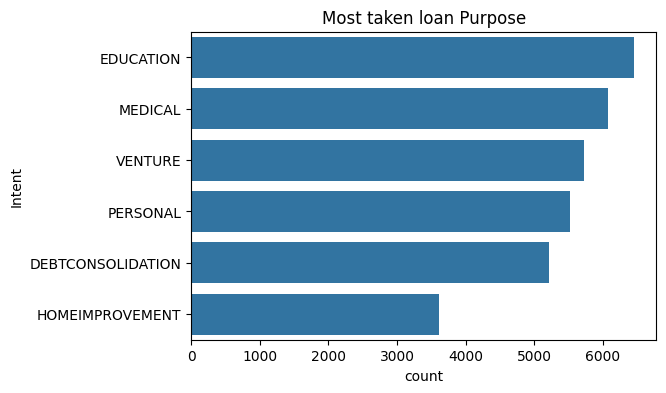

In [17]:
plt.figure(figsize=(6,4))
order=df['Intent'].value_counts().index
sns.countplot(df['Intent'],order=order)
plt.title('Most taken loan Purpose')
plt.show()

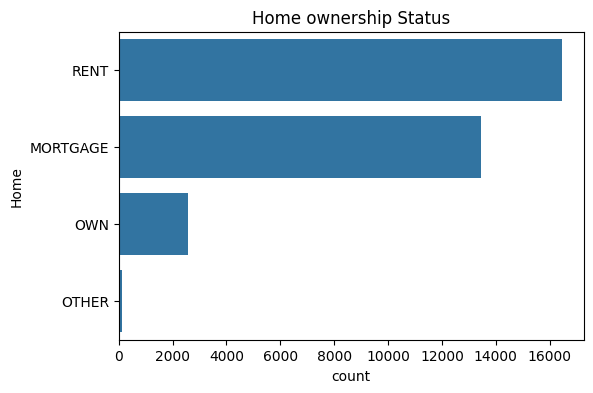

In [18]:
plt.figure(figsize=(6,4))
order=df['Home'].value_counts().index
sns.countplot(df['Home'],order=order)
plt.title('Home ownership Status')
plt.show()

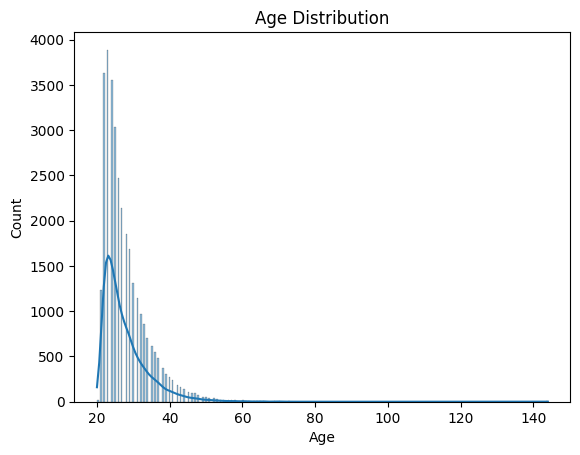

In [19]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

In [20]:
# Find rows where Age > 100
ages_over_100 = df[df['Age'] > 100]
ages_over_100

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
81,81,144,250000,RENT,4.0,VENTURE,4800,13.570000,0,0.02,N,3
183,183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.860000,0,0.03,N,2
575,575,123,80004,RENT,2.0,EDUCATION,20400,10.250000,0,0.25,N,3
747,747,123,78000,RENT,7.0,VENTURE,20000,11.011695,0,0.26,N,4
32297,32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.730000,0,0.00,N,25


In [21]:
#comuting for outliers in the age coloum
median_age=df[df['Age']<=100]['Age'].median()
df.loc[df['Age']>100,'Age']=median_age

<Axes: xlabel='Age', ylabel='Count'>

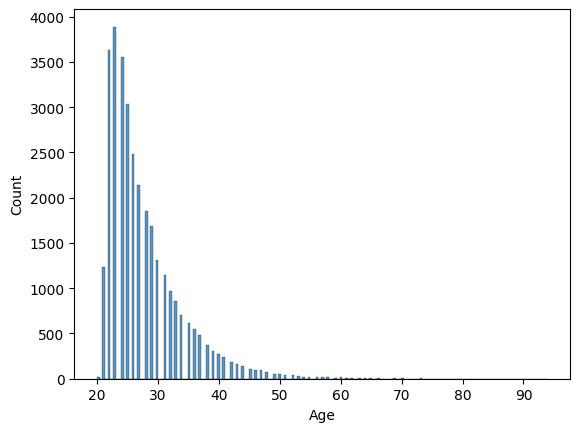

In [22]:
sns.histplot(df['Age'])

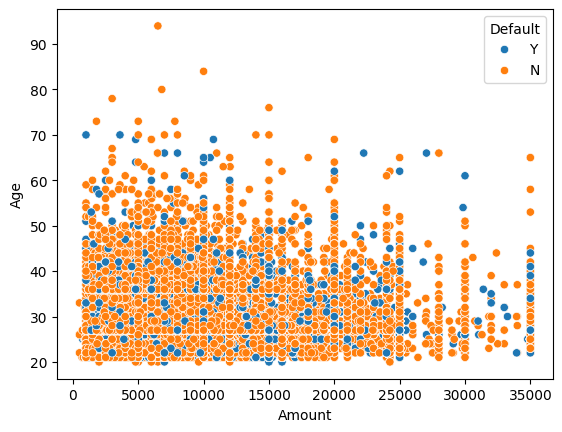

In [23]:
# age vs ammount of loan 
sns.scatterplot(x='Amount',y='Age',data=df,hue='Default')
plt.show()

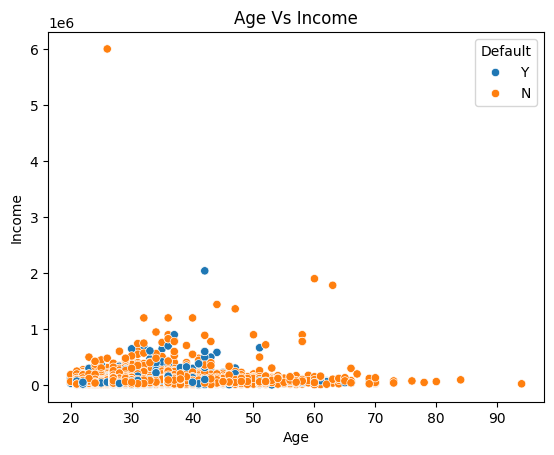

In [24]:
sns.scatterplot(x='Age',y='Income',data=df,hue='Default')
plt.title('Age Vs Income')
plt.show()

In [25]:
#Encoding Categorical Variables
# it will convert the categolical columns to numerical columns
encoder=LabelEncoder()
for col in cat_features:
    df[col]=encoder.fit_transform(df[col])


In [26]:
df.head(2)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2


In [27]:
#feature selection 
X=df.drop(columns=['Default','Id'])
y=df['Default']

In [28]:
# Training and spliting the data to train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
#traning the model by Random forest 
model=RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [30]:
#model evaluation 
y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8258823529411765

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      8037
           1       0.51      0.43      0.47      1738

    accuracy                           0.83      9775
   macro avg       0.70      0.67      0.68      9775
weighted avg       0.81      0.83      0.82      9775


Confusion Matrix:
 [[7331  706]
 [ 996  742]]


Text(0.5, 0, 'Feature of importance')

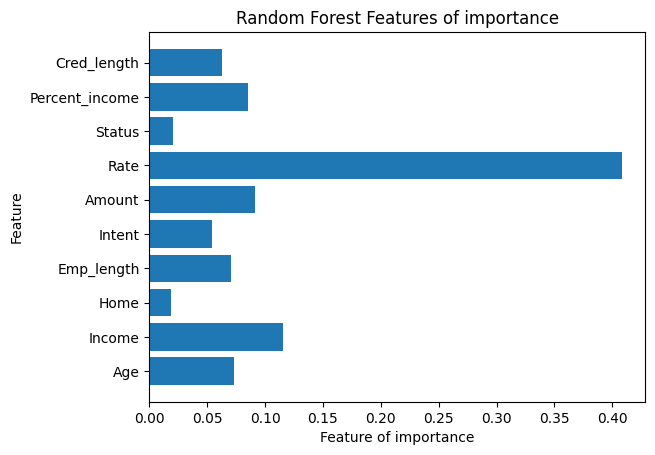

In [36]:
#Feature of importance 
plt.Figure(figsize=(8,5))
importance=model.feature_importances_
feat_names=X.columns
plt.barh(feat_names,importance)
plt.title('Random Forest Features of importance')
plt.ylabel('Feature')
plt.xlabel('Feature of importance')

